<a href="https://colab.research.google.com/github/ivancostabernardo/IBM_Data_Science_Certificate/blob/main/2023_11_Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Bank Marketing Campaign

Data source: https://archive.ics.uci.edu/dataset/222/bank+marketing

## Preparation

### Installing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import statsmodels.formula.api as smf

In [2]:
sns.set_theme()

Let's also install `ucimlrepo`, a package to easily import datasets from the UC Irvine Machine Learning Repository into scripts and notebooks. You can check how to use it on [its GitHub repository](https://github.com/uci-ml-repo/ucimlrepo).

In [3]:
!pip install ucimlrepo

### Loading the data

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

Both `X` and `y` have 45 211 rows. The dataset `X` has 16 features, and `y` has the target (whether the client has subscribed a term deposit).

In [5]:
print(X.shape)
print(y.shape)

(45211, 16)
(45211, 1)


In [79]:
df = pd.concat([X, y], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [7]:
bank_marketing.variables['description'].values

array([None,
       "type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')",
       "marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)",
       "(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')",
       'has credit in default?', 'average yearly balance',
       'has housing loan?', 'has personal loan?',
       "contact communication type (categorical: 'cellular','telephone') ",
       'last contact day of the week',
       "last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')",
       " last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the

- `age`: client's age
- `job`: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- `marital`: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- `education`: (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- `default`: has credit in default?
- `balance`: average yearly balance
- `housing`: has housing loan?
- `loan`: has personal loan?
- `contact`: contact communication type (categorical: 'cellular', 'telephone')
- `day_of_week`: last contact day of the week (later corrected to `day_of_month`)
- `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- `duration`: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- `previous`: number of contacts performed before this campaign and for this client
- `poutcome`: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')
- `y`: has the client subscribed a term deposit?

In [95]:
df['y_bool'] = df['y'] == 'yes'
df['default_bool'] = df['default'] == 'yes'
df['housing_bool'] = df['housing'] == 'yes'
df['loan_bool'] = df['loan'] == 'yes'
df['poutcome_bool'] = df['poutcome'] == 'success'

## Exploratory analysis

In [8]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Target variable (has the client subscribed a term deposit?)

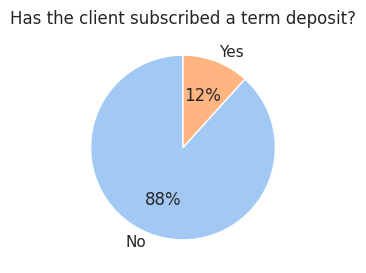

In [71]:
fig, ax = plt.subplots(figsize=(3, 3))

labels = {'yes': 'Yes', 'no': 'No'}

by_y = df['y'].value_counts().reset_index().rename(columns={'y': 'count', 'index': 'y'})
by_y['label'] = by_y['y'].map(labels)

plt.pie(data=by_y, x='count', labels='label', colors=sns.color_palette('pastel'), startangle=90, autopct='%.0f%%')
ax.set_title('Has the client subscribed a term deposit?')

plt.show()

### Age

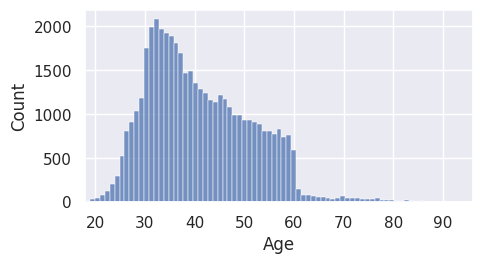

In [11]:
fig, ax = plt.subplots(figsize=(5, 2.5))

ax.set_xlim(18, 96)
sns.histplot(df['age'], bins=78)
ax.set_xlabel('Age')

plt.show()

In [12]:
df['age_group'] = np.where(df['age'] < 25, '18 - 24 years',
                  np.where(df['age'] < 35, '25 - 34 years',
                  np.where(df['age'] < 45, '35 - 44 years',
                  np.where(df['age'] < 60, '45 - 59 years',
                  np.where(df['age'] < 70, '60 - 70 years', '71+ years')))))

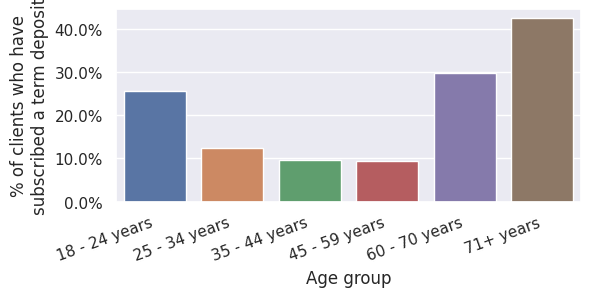

In [13]:
fig, ax = plt.subplots(figsize=(6, 2.5))

sns.barplot(data=df, x='age_group', y='y_bool', order=sorted(df['age_group'].unique()), errorbar=('ci', False), ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')
ax.set_xlabel('Age group')
ax.set_ylabel('% of clients who have\nsubscribed a term deposit')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.show()

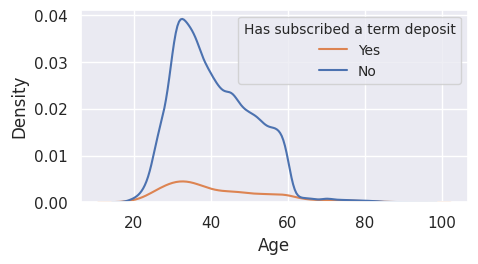

In [14]:
fig, ax = plt.subplots(figsize=(5, 2.5))

# sns.kdeplot(df.loc[df['y_bool'], 'age'])
# sns.kdeplot(df.loc[~df['y_bool'], 'age'])
sns.kdeplot(df, x='age', hue='y')

ax.set_xlabel('Age')

legend = ax.legend(title='Has subscribed a term deposit', labels=['Yes', 'No'], fontsize=10)
plt.setp(legend.get_title(), fontsize='small')

plt.show()

### Type of job

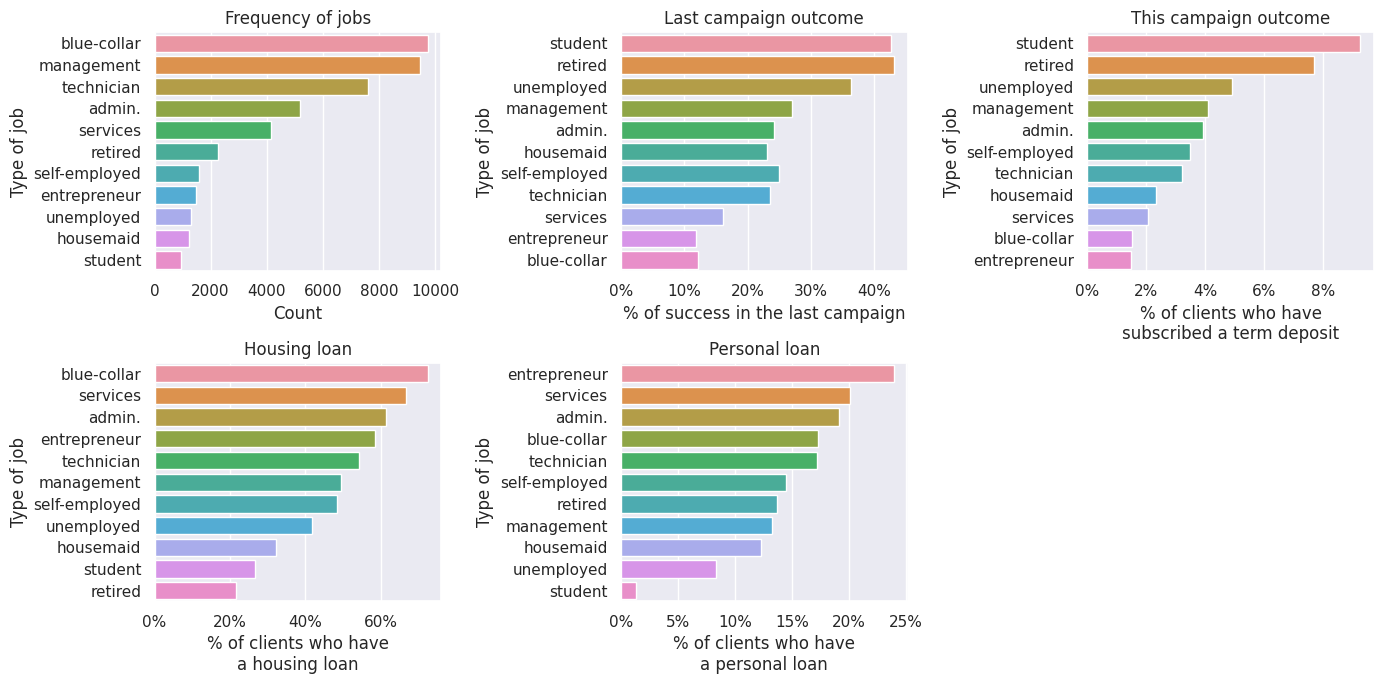

In [123]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14, 7))

sns.countplot(data=df, y='job', order=df['job'].value_counts().sort_values(ascending=False).index, ax=ax[0, 0])

ax[0, 0].set_xlabel('Count')
ax[0, 0].set_ylabel('Type of job')
ax[0, 0].set_title('Frequency of jobs')

sns.barplot(data=df.loc[(~df['poutcome'].isna()) & (df['poutcome'] != 'other'), :], y='job', x='poutcome_bool',
            order=df.loc[(~df['poutcome'].isna()) & (df['poutcome'] != 'other'), :].groupby('job')['y_bool'].mean().sort_values(ascending=False).index,
            errorbar=('ci', False), ax=ax[0, 1])

ax[0, 1].set_xlabel('% of success in the last campaign')
ax[0, 1].set_ylabel('Type of job')
ax[0, 1].set_title('Last campaign outcome')
ax[0, 1].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

sns.barplot(data=df, y='job', x='poutcome_bool',
            order=df.groupby('job')['poutcome_bool'].mean().sort_values(ascending=False).index,
            errorbar=('ci', False), ax=ax[0, 2])

ax[0, 2].set_xlabel('% of clients who have\nsubscribed a term deposit')
ax[0, 2].set_ylabel('Type of job')
ax[0, 2].set_title('This campaign outcome')
ax[0, 2].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

sns.barplot(data=df, y='job', x='housing_bool',
            order=df.groupby('job')['housing_bool'].mean().sort_values(ascending=False).index,
            errorbar=('ci', False), ax=ax[1, 0])

ax[1, 0].set_xlabel('% of clients who have\na housing loan')
ax[1, 0].set_ylabel('Type of job')
ax[1, 0].set_title('Housing loan')
ax[1, 0].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

sns.barplot(data=df, y='job', x='loan_bool',
            order=df.groupby('job')['loan_bool'].mean().sort_values(ascending=False).index,
            errorbar=('ci', False), ax=ax[1, 1])

ax[1, 1].set_xlabel('% of clients who have\na personal loan')
ax[1, 1].set_ylabel('Type of job')
ax[1, 1].set_title('Personal loan')
ax[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

ax[1, 2].axis('off')

plt.tight_layout()

plt.show()

### Marital status

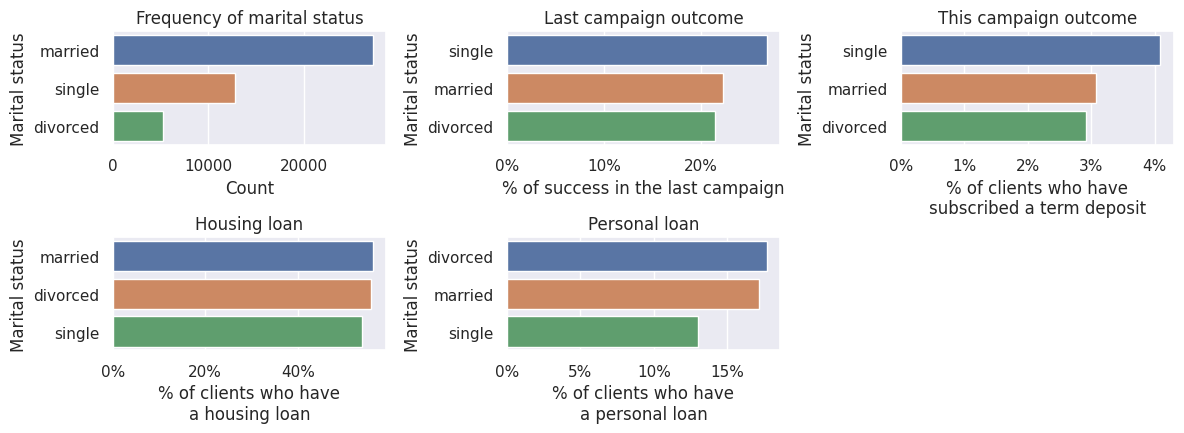

In [124]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12, 4.5))

sns.countplot(data=df, y='marital', order=df['marital'].value_counts().sort_values(ascending=False).index, ax=ax[0, 0])

ax[0, 0].set_xlabel('Count')
ax[0, 0].set_ylabel('Marital status')
ax[0, 0].set_title('Frequency of marital status')

sns.barplot(data=df.loc[(~df['poutcome'].isna()) & (df['poutcome'] != 'other'), :], y='marital', x='poutcome_bool',
            order=df.loc[(~df['poutcome'].isna()) & (df['poutcome'] != 'other'), :].groupby('marital')['y_bool'].mean().sort_values(ascending=False).index,
            errorbar=('ci', False), ax=ax[0, 1])

ax[0, 1].set_xlabel('% of success in the last campaign')
ax[0, 1].set_ylabel('Marital status')
ax[0, 1].set_title('Last campaign outcome')
ax[0, 1].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

sns.barplot(data=df, y='marital', x='poutcome_bool',
            order=df.groupby('marital')['poutcome_bool'].mean().sort_values(ascending=False).index,
            errorbar=('ci', False), ax=ax[0, 2])

ax[0, 2].set_xlabel('% of clients who have\nsubscribed a term deposit')
ax[0, 2].set_ylabel('Marital status')
ax[0, 2].set_title('This campaign outcome')
ax[0, 2].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

sns.barplot(data=df, y='marital', x='housing_bool',
            order=df.groupby('marital')['housing_bool'].mean().sort_values(ascending=False).index,
            errorbar=('ci', False), ax=ax[1, 0])

ax[1, 0].set_xlabel('% of clients who have\na housing loan')
ax[1, 0].set_ylabel('Marital status')
ax[1, 0].set_title('Housing loan')
ax[1, 0].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

sns.barplot(data=df, y='marital', x='loan_bool',
            order=df.groupby('marital')['loan_bool'].mean().sort_values(ascending=False).index,
            errorbar=('ci', False), ax=ax[1, 1])

ax[1, 1].set_xlabel('% of clients who have\na personal loan')
ax[1, 1].set_ylabel('Marital status')
ax[1, 1].set_title('Personal loan')
ax[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

ax[1, 2].axis('off')

plt.tight_layout()
plt.show()

### Education level

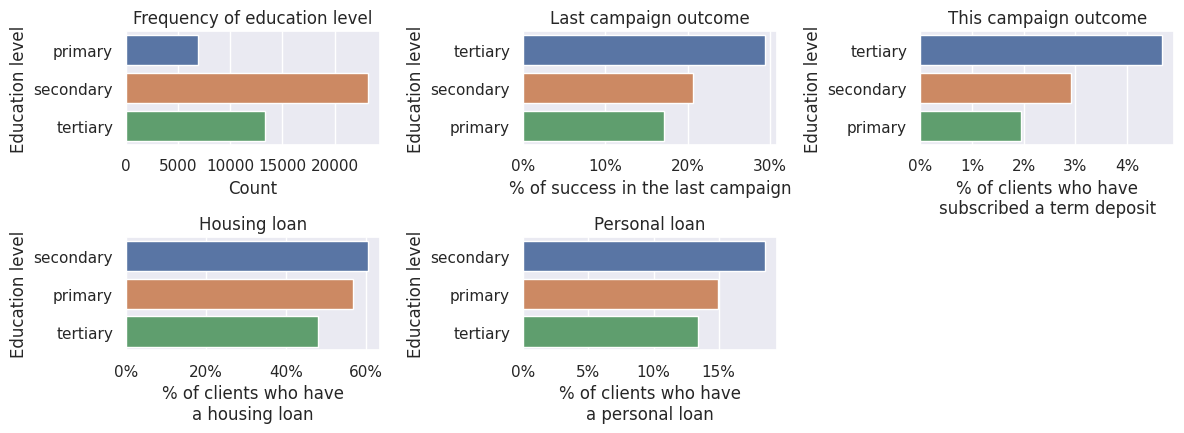

In [125]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12, 4.5))

sns.countplot(data=df, y='education', order=['primary', 'secondary', 'tertiary'], ax=ax[0, 0])

ax[0, 0].set_xlabel('Count')
ax[0, 0].set_ylabel('Education level')
ax[0, 0].set_title('Frequency of education level')

sns.barplot(data=df.loc[(~df['poutcome'].isna()) & (df['poutcome'] != 'other'), :], y='education', x='poutcome_bool',
            order=df.loc[(~df['poutcome'].isna()) & (df['poutcome'] != 'other'), :].groupby('education')['y_bool'].mean().sort_values(ascending=False).index,
            errorbar=('ci', False), ax=ax[0, 1])

ax[0, 1].set_xlabel('% of success in the last campaign')
ax[0, 1].set_ylabel('Education level')
ax[0, 1].set_title('Last campaign outcome')
ax[0, 1].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

sns.barplot(data=df, y='education', x='poutcome_bool',
            order=df.groupby('education')['poutcome_bool'].mean().sort_values(ascending=False).index,
            errorbar=('ci', False), ax=ax[0, 2])

ax[0, 2].set_xlabel('% of clients who have\nsubscribed a term deposit')
ax[0, 2].set_ylabel('Education level')
ax[0, 2].set_title('This campaign outcome')
ax[0, 2].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

sns.barplot(data=df, y='education', x='housing_bool',
            order=df.groupby('education')['housing_bool'].mean().sort_values(ascending=False).index,
            errorbar=('ci', False), ax=ax[1, 0])

ax[1, 0].set_xlabel('% of clients who have\na housing loan')
ax[1, 0].set_ylabel('Education level')
ax[1, 0].set_title('Housing loan')
ax[1, 0].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

sns.barplot(data=df, y='education', x='loan_bool',
            order=df.groupby('education')['loan_bool'].mean().sort_values(ascending=False).index,
            errorbar=('ci', False), ax=ax[1, 1])

ax[1, 1].set_xlabel('% of clients who have\na personal loan')
ax[1, 1].set_ylabel('Education level')
ax[1, 1].set_title('Personal loan')
ax[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

ax[1, 2].axis('off')

plt.tight_layout()
plt.show()

### Credit default

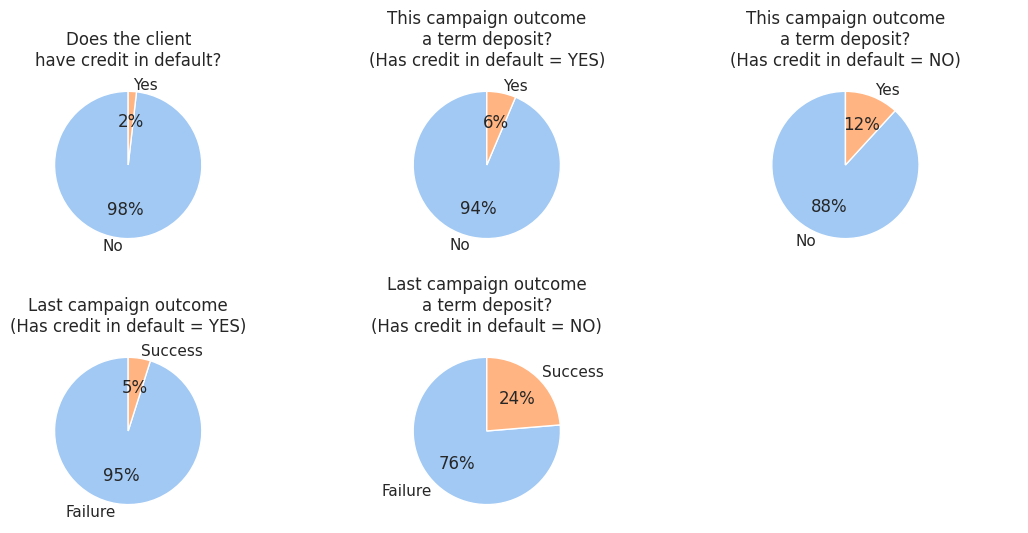

In [126]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(11, 5.5))

labels = {'yes': 'Yes', 'no': 'No'}
labels_outcome = {'failure': 'Failure', 'success': 'Success'}

by_default = df['default'].value_counts().reset_index().rename(columns={'default': 'count', 'index': 'default'})
by_default['default'] = by_default['default'].map(labels)

by_y_default_yes = df.loc[df['default'] == 'yes', 'y'].value_counts().reset_index().rename(columns={'y': 'count', 'index': 'y'})
by_y_default_yes['y'] = by_y_default_yes['y'].map(labels)

by_y_default_no = df.loc[df['default'] == 'no', 'y'].value_counts().reset_index().rename(columns={'y': 'count', 'index': 'y'})
by_y_default_no['y'] = by_y_default_no['y'].map(labels)

by_poutcome_yes = df.loc[(df['default'] == 'yes') & (df['poutcome'] != 'other') & (~df['poutcome'].isna()), 'poutcome'].value_counts().reset_index().rename(columns={'poutcome': 'count', 'index': 'poutcome'})
by_poutcome_yes['poutcome'] = by_poutcome_yes['poutcome'].map(labels_outcome)

by_poutcome_no = df.loc[(df['default'] == 'no') & (df['poutcome'] != 'other') & (~df['poutcome'].isna()), 'poutcome'].value_counts().reset_index().rename(columns={'poutcome': 'count', 'index': 'poutcome'})
by_poutcome_no['poutcome'] = by_poutcome_no['poutcome'].map(labels_outcome)

ax[0, 0].pie(data=by_default, x='count', labels='default', colors=sns.color_palette('pastel'), startangle=90, autopct='%.0f%%')
ax[0, 0].set_title('Does the client\nhave credit in default?')

ax[0, 1].pie(data=by_y_default_yes, x='count', labels='y', colors=sns.color_palette('pastel'), startangle=90, autopct='%.0f%%')
ax[0, 1].set_title('This campaign outcome\na term deposit?\n(Has credit in default = YES)')

ax[0, 2].pie(data=by_y_default_no, x='count', labels='y', colors=sns.color_palette('pastel'), startangle=90, autopct='%.0f%%')
ax[0, 2].set_title('This campaign outcome\na term deposit?\n(Has credit in default = NO)')

ax[1, 0].pie(data=by_poutcome_yes, x='count', labels='poutcome', colors=sns.color_palette('pastel'), startangle=90, autopct='%.0f%%')
ax[1, 0].set_title('Last campaign outcome\n(Has credit in default = YES)')

ax[1, 1].pie(data=by_poutcome_no, x='count', labels='poutcome', colors=sns.color_palette('pastel'), startangle=90, autopct='%.0f%%')
ax[1, 1].set_title('Last campaign outcome\na term deposit?\n(Has credit in default = NO)')

ax[1, 2].axis('off')

plt.tight_layout()
plt.show()

### Average yearly balance

In [127]:
(df['balance'] > 0).value_counts()

True     37931
False     7280
Name: balance, dtype: int64

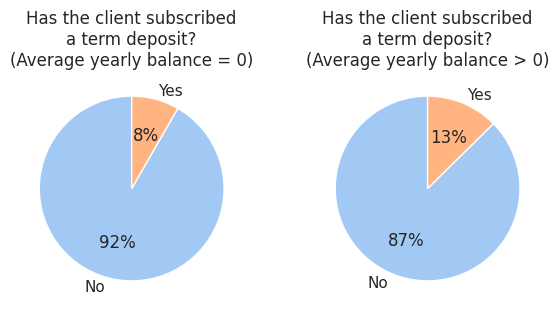

In [72]:
by_y_balance_0 = df.loc[df['balance'] == 0, 'y'].value_counts().reset_index().rename(columns={'index': 'y', 'y': 'count'})
by_y_balance_0['y'] = by_y_balance_0['y'].map(labels)
by_y_balance_gtr_0 = df.loc[df['balance'] > 0, 'y'].value_counts().reset_index().rename(columns={'index': 'y', 'y': 'count'})
by_y_balance_gtr_0['y'] = by_y_balance_gtr_0['y'].map(labels)

fig, ax = plt.subplots(ncols=2, figsize=(7, 3))

ax[0].pie(data=by_y_balance_0, x='count', labels='y', colors=sns.color_palette('pastel'), startangle=90, autopct='%.0f%%')
ax[0].set_title('Has the client subscribed\na term deposit?\n(Average yearly balance = 0)')
ax[1].pie(data=by_y_balance_gtr_0, x='count', labels='y', colors=sns.color_palette('pastel'), startangle=90, autopct='%.0f%%')
ax[1].set_title('Has the client subscribed\na term deposit?\n(Average yearly balance > 0)')

plt.show()

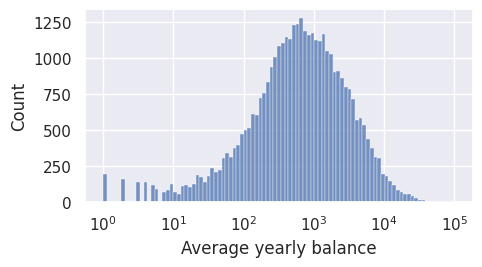

In [21]:
fig, ax = plt.subplots(figsize=(5, 2.5))

sns.histplot(df.query('balance > 0')['balance'], log_scale=True)
ax.set_xlabel('Average yearly balance')

plt.show()

In [90]:
df['balance_group'] = np.where(df['balance'] == 0, '0',
                      np.where(df['balance'] < 1e2, '0 |-- 100',
                      np.where(df['balance'] < 3e2, '100 |-- 300',
                      np.where(df['balance'] < 1e3, '300 |-- 1K',
                      np.where(df['balance'] < 3e3, '1K |-- 3K',
                      np.where(df['balance'] < 1e4, '3K |-- 10K', '10K+'))))))

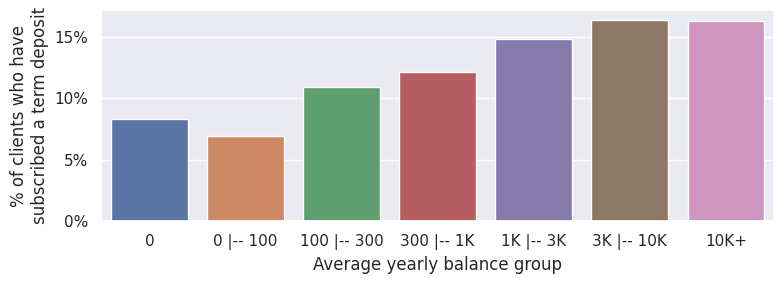

In [91]:
fig, ax = plt.subplots(figsize=(8, 3))

order_balance_group = ['0', '0 |-- 100', '100 |-- 300', '300 |-- 1K', '1K |-- 3K', '3K |-- 10K', '10K+']

sns.barplot(data=df, x='balance_group', y='y_bool', order=order_balance_group, errorbar=('ci', False), ax=ax)

ax.set_xlabel('Average yearly balance group')
ax.set_ylabel('% of clients who have\nsubscribed a term deposit')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.tight_layout()
plt.show()

### Has housing or personal loan

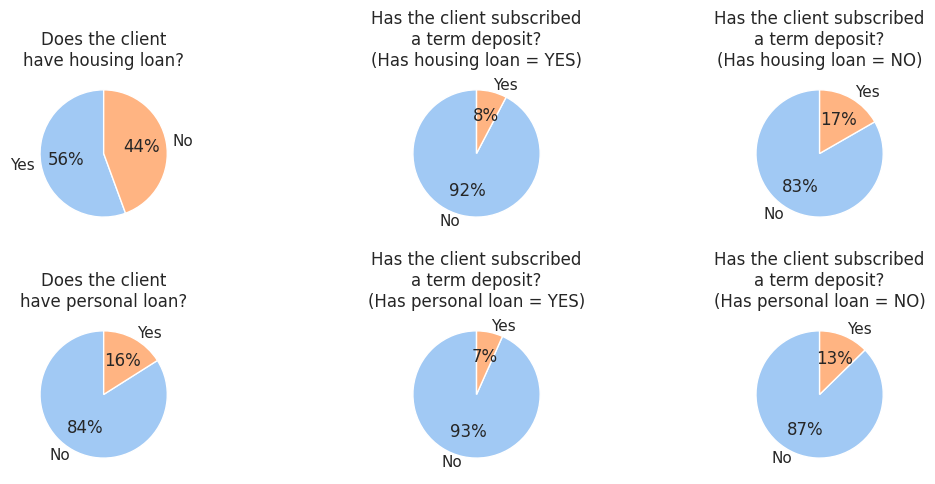

In [81]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(11, 5), width_ratios=(1, 0.1, 1, 1))

labels = {'yes': 'Yes', 'no': 'No'}

by_housing = df['housing'].value_counts().reset_index().rename(columns={'housing': 'count', 'index': 'housing'})
by_housing['housing'] = by_housing['housing'].map(labels)
by_y_housing_yes = df.loc[df['housing'] == 'yes', 'y'].value_counts().reset_index().rename(columns={'y': 'count', 'index': 'y'})
by_y_housing_yes['y'] = by_y_housing_yes['y'].map(labels)
by_y_housing_no = df.loc[df['housing'] == 'no', 'y'].value_counts().reset_index().rename(columns={'y': 'count', 'index': 'y'})
by_y_housing_no['y'] = by_y_housing_no['y'].map(labels)

ax[0, 0].pie(data=by_housing, x='count', labels='housing', colors=sns.color_palette('pastel'), startangle=90, autopct='%.0f%%')
ax[0, 0].set_title('Does the client\nhave housing loan?')
ax[0, 1].axis('off')
ax[0, 2].pie(data=by_y_housing_yes, x='count', labels='y', colors=sns.color_palette('pastel'), startangle=90, autopct='%.0f%%')
ax[0, 2].set_title('Has the client subscribed\na term deposit?\n(Has housing loan = YES)')
ax[0, 3].pie(data=by_y_housing_no, x='count', labels='y', colors=sns.color_palette('pastel'), startangle=90, autopct='%.0f%%')
ax[0, 3].set_title('Has the client subscribed\na term deposit?\n(Has housing loan = NO)')

by_loan = df['loan'].value_counts().reset_index().rename(columns={'loan': 'count', 'index': 'loan'})
by_loan['loan'] = by_loan['loan'].map(labels)
by_y_loan_yes = df.loc[df['loan'] == 'yes', 'y'].value_counts().reset_index().rename(columns={'y': 'count', 'index': 'y'})
by_y_loan_yes['y'] = by_y_loan_yes['y'].map(labels)
by_y_loan_no = df.loc[df['loan'] == 'no', 'y'].value_counts().reset_index().rename(columns={'y': 'count', 'index': 'y'})
by_y_loan_no['y'] = by_y_loan_no['y'].map(labels)

ax[1, 0].pie(data=by_loan, x='count', labels='loan', colors=sns.color_palette('pastel'), startangle=90, autopct='%.0f%%')
ax[1, 0].set_title('Does the client\nhave personal loan?')
ax[1, 1].axis('off')
ax[1, 2].pie(data=by_y_loan_yes, x='count', labels='y', colors=sns.color_palette('pastel'), startangle=90, autopct='%.0f%%')
ax[1, 2].set_title('Has the client subscribed\na term deposit?\n(Has personal loan = YES)')
ax[1, 3].pie(data=by_y_loan_no, x='count', labels='y', colors=sns.color_palette('pastel'), startangle=90, autopct='%.0f%%')
ax[1, 3].set_title('Has the client subscribed\na term deposit?\n(Has personal loan = NO)')

plt.tight_layout()
plt.show()

### Contact communication type

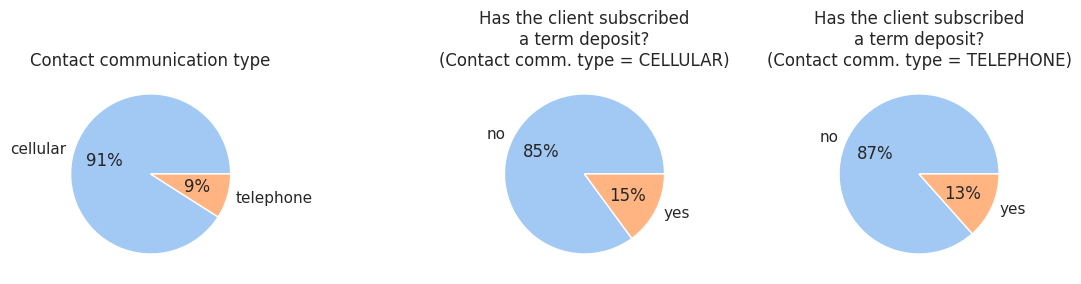

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(11, 3), width_ratios=(1, 0.1, 1, 1))

by_contact = df['contact'].value_counts().reset_index().rename(columns={'contact': 'count', 'index': 'contact'})
by_contact['contact'] = by_contact['contact']
by_y_contact_cell = df.loc[df['contact'] == 'cellular', 'y'].value_counts().reset_index().rename(columns={'y': 'count', 'index': 'y'})
by_y_contact_tel = df.loc[df['contact'] == 'telephone', 'y'].value_counts().reset_index().rename(columns={'y': 'count', 'index': 'y'})

ax[0].pie(data=by_contact, x='count', labels='contact', colors=sns.color_palette('pastel'), autopct='%.0f%%')
ax[0].set_title('Contact communication type')
ax[1].axis('off')
ax[2].pie(data=by_y_contact_cell, x='count', labels='y', colors=sns.color_palette('pastel'), autopct='%.0f%%')
ax[2].set_title('Has the client subscribed\na term deposit?\n(Contact comm. type = CELLULAR)')
ax[3].pie(data=by_y_contact_tel, x='count', labels='y', colors=sns.color_palette('pastel'), autopct='%.0f%%')
ax[3].set_title('Has the client subscribed\na term deposit?\n(Contact comm. type = TELEPHONE)')

plt.tight_layout()
plt.show()

### Last contact day of the month

In [26]:
df['day_of_week'].value_counts().sort_index()

1      322
2     1293
3     1079
4     1445
5     1910
6     1932
7     1817
8     1842
9     1561
10     524
11    1479
12    1603
13    1585
14    1848
15    1703
16    1415
17    1939
18    2308
19    1757
20    2752
21    2026
22     905
23     939
24     447
25     840
26    1035
27    1121
28    1830
29    1745
30    1566
31     643
Name: day_of_week, dtype: int64

In [82]:
df = df.rename(columns={'day_of_week': 'day_of_month'})

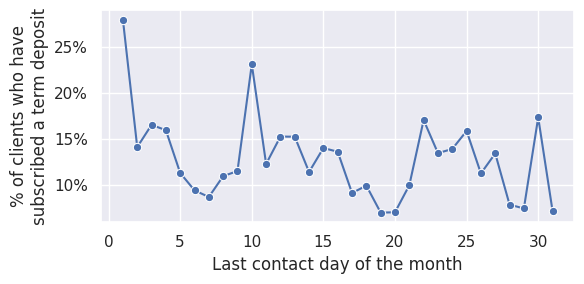

In [87]:
y_by_day_month = df.groupby('day_of_month')['y_bool'].mean().reset_index()

fig, ax = plt.subplots(figsize=(6, 3))

sns.lineplot(y_by_day_month, x='day_of_month', y='y_bool', marker='o')

ax.set_xlabel('Last contact day of the month')
ax.set_ylabel('% of clients who have\nsubscribed a term deposit')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.tight_layout()
plt.show()

### Last contact month of year

In [29]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [30]:
month_number = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

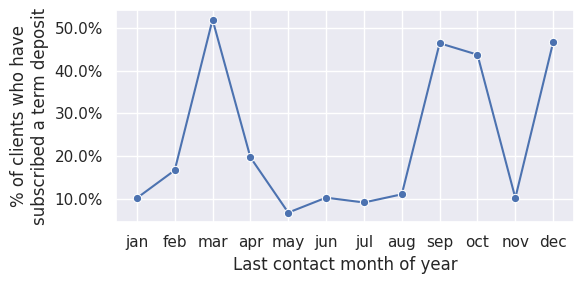

In [31]:
y_by_month = df.groupby('month')['y_bool'].mean().reset_index()
y_by_month['month_number'] = y_by_month['month'].map(month_number)

fig, ax = plt.subplots(figsize=(6, 3))

sns.lineplot(y_by_month, x='month_number', y='y_bool', marker='o')

ax.set_xticks(ticks=range(1, 13), labels=[m for m in month_number])
ax.set_xlabel('Last contact month of year')
ax.set_ylabel('% of clients who have\nsubscribed a term deposit')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.tight_layout()
plt.show()

### Last contact duration, in seconds

In [32]:
(df['duration'] > 0).value_counts()

True     45208
False        3
Name: duration, dtype: int64

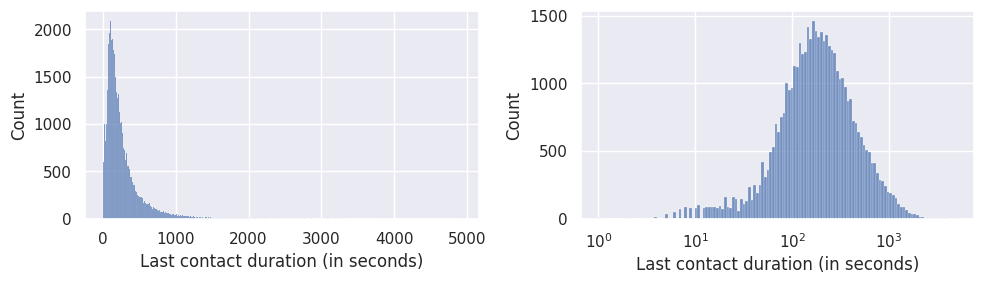

In [33]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3))

sns.histplot(df['duration'], ax=ax[0])
ax[0].set_xlabel('Last contact duration (in seconds)')

sns.histplot(df.query('duration > 0')['duration'], log_scale=True, ax=ax[1])
ax[1].set_xlabel('Last contact duration (in seconds)')

plt.tight_layout()
plt.show()

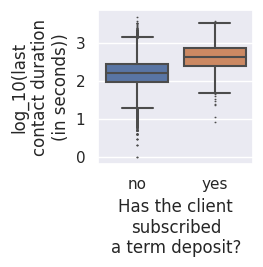

In [34]:
fig, ax = plt.subplots(figsize=(2, 2))

sns.boxplot(x=df.query('duration > 0')['y'], y=np.log10(df.query('duration > 0')['duration']), fliersize=0.4)
ax.set_xlabel('Has the client\nsubscribed\na term deposit?')
ax.set_ylabel('log_10(last\ncontact duration\n(in seconds))')

plt.show()

### Number of contacts performed during this campaign and for this client

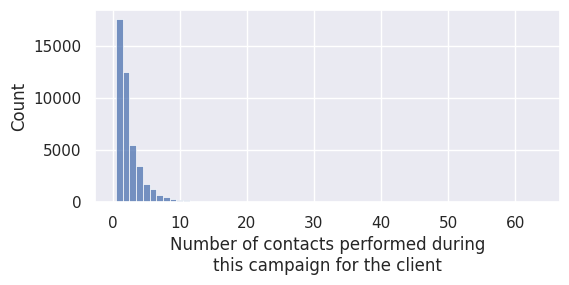

In [35]:
# n_campaign = df['campaign'].value_counts().reset_index().rename(columns={'campaign': 'count', 'index': 'campaign'})

fig, ax = plt.subplots(figsize=(6, 2.5))

sns.histplot(x=df['campaign'] - 0.5, bins=np.arange(df['campaign'].min() - 0.5, df['campaign'].max() + 1, 1))

ax.set_xlabel('Number of contacts performed during\nthis campaign for the client')
plt.show()

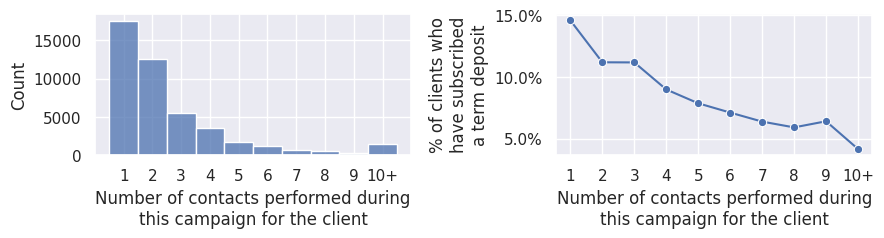

In [36]:
df['campaign_trimmed'] = np.minimum(df['campaign'], 10)

y_by_campaign = df.groupby('campaign_trimmed')['y_bool'].mean().reset_index()

fig, ax = plt.subplots(ncols=2, figsize=(9, 2.5))

sns.histplot(x=df['campaign_trimmed'] - 0.5, bins=np.arange(df['campaign_trimmed'].min() - 0.5, df['campaign_trimmed'].max() + 1, 1), ax=ax[0])
ax[0].set_xticks(ticks=range(1, 11), labels=np.concatenate((np.arange(1, 10).astype('str'), ['10+'])))
ax[0].set_xlabel('Number of contacts performed during\nthis campaign for the client')

sns.lineplot(y_by_campaign, x='campaign_trimmed', y='y_bool', marker='o', ax=ax[1])
ax[1].set_xticks(ticks=range(1, 11), labels=np.concatenate((np.arange(1, 10).astype('str'), ['10+'])))
ax[1].set_xlabel('Number of contacts performed during\nthis campaign for the client')
ax[1].set_ylabel('% of clients who\nhave subscribed\na term deposit')
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.tight_layout()
plt.show()

### Number of days that passed by after the client was last contacted from a previous campaign

In [37]:
(np.minimum(df['pdays'], 1)).value_counts()

-1    36954
 1     8257
Name: pdays, dtype: int64

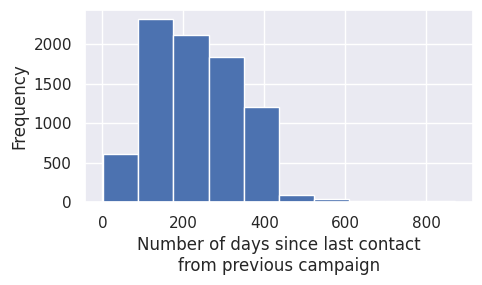

In [38]:
ax = df.query('pdays >= 0')['pdays'].plot(kind='hist', figsize=(5, 2.5))
ax.set_xlabel('Number of days since last contact\nfrom previous campaign')
plt.show()

In [39]:
df['pdays_group'] = np.where(df['pdays'] < 50, '0 |-- 50',
                    np.where(df['pdays'] < 100, '50 |-- 100',
                    np.where(df['pdays'] < 150, '100 |-- 150',
                    np.where(df['pdays'] < 200, '150 |-- 200',
                    np.where(df['pdays'] < 250, '200 |-- 250',
                    np.where(df['pdays'] < 300, '250 |-- 300',
                    np.where(df['pdays'] < 350, '300 |-- 350',
                    np.where(df['pdays'] < 400, '350 |-- 400', '400+'))))))))

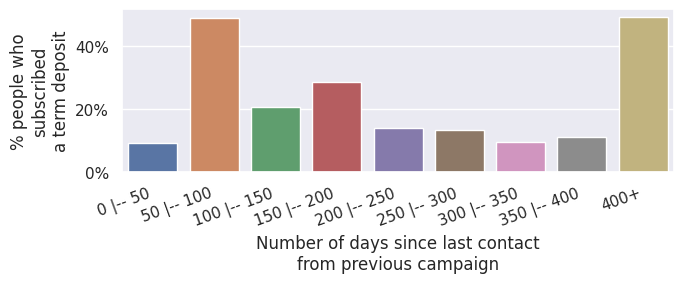

In [40]:
y_by_pdays_group = df.groupby('pdays_group')['y_bool'].mean().reset_index().rename(columns={'index': 'pdays_group', 'y_bool': 'pct_y'})
pdays_group_order = ['0 |-- 50', '50 |-- 100', '100 |-- 150', '150 |-- 200', '200 |-- 250', '250 |-- 300', '300 |-- 350', '350 |-- 400', '400+']

fig, ax = plt.subplots(figsize=(7, 3))

sns.barplot(data=y_by_pdays_group, x='pdays_group', y='pct_y', order=pdays_group_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')
ax.set_xlabel('Number of days since last contact\nfrom previous campaign')
ax.set_ylabel('% people who\nsubscribed\na term deposit')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.tight_layout()
plt.show()

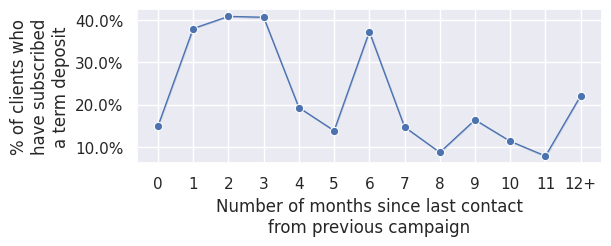

In [41]:
df['pmonths'] = np.minimum(np.floor(df['pdays'] / 30), 12)

fig, ax = plt.subplots(figsize=(6, 2))

sns.lineplot(data=df.query('pdays >= 0'), x='pmonths', y='y_bool', marker='o', errorbar=('ci', False), linewidth=1)
ax.set_xticks(ticks=range(0, 13), labels=np.concatenate((np.arange(0, 12).astype('str'), ['12+'])))
ax.set_xlabel('Number of months since last contact\nfrom previous campaign')
ax.set_ylabel('% of clients who\nhave subscribed\na term deposit')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.show()

### Number of contacts performed before this campaign and for this client

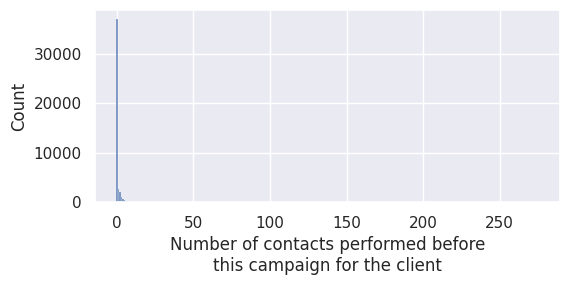

In [54]:
fig, ax = plt.subplots(figsize=(6, 2.5))

sns.histplot(x=df['previous'] - 0.5, bins=np.arange(df['previous'].min() - 0.5, df['previous'].max() + 1, 1))

ax.set_xlabel('Number of contacts performed before\nthis campaign for the client')
plt.show()

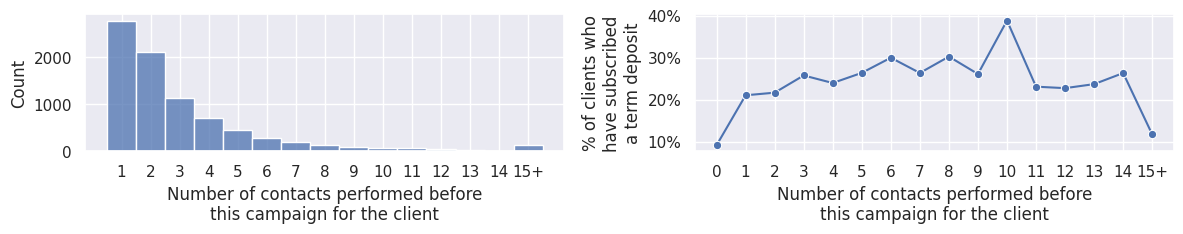

In [92]:
df['previous_trimmed'] = np.minimum(df['previous'], 15)

y_by_previous = df.groupby('previous_trimmed')['y_bool'].mean().reset_index()

fig, ax = plt.subplots(ncols=2, figsize=(12, 2.5))

sns.histplot(x=df.query('previous > 0')['previous_trimmed'] - 0.5,
             bins=np.arange(df.query('previous > 0')['previous_trimmed'].min() - 0.5,
                            df.query('previous > 0')['previous_trimmed'].max() + 1, 1), ax=ax[0])
ax[0].set_xticks(ticks=range(1, 16), labels=np.concatenate((np.arange(1, 15).astype('str'), ['15+'])))
ax[0].set_xlabel('Number of contacts performed before\nthis campaign for the client')

sns.lineplot(y_by_previous, x='previous_trimmed', y='y_bool', marker='o', ax=ax[1])
ax[1].set_xticks(ticks=range(0, 16), labels=np.concatenate((np.arange(0, 15).astype('str'), ['15+'])))
ax[1].set_xlabel('Number of contacts performed before\nthis campaign for the client')
ax[1].set_ylabel('% of clients who\nhave subscribed\na term deposit')
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.tight_layout()
plt.show()

### Outcome of the previous marketing campaign

1. Which profession is most likely to take out a loan? Which type?

In [42]:
df['housing'] = df['housing'] == 'yes'
df['personal'] = df['loan'] == 'yes'
df['housing_or_personal'] = df['housing'] | df['personal']
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,y,y_bool,age_group,balance_group,campaign_trimmed,pdays_group,pmonths,personal,housing_or_personal
0,58,management,married,tertiary,no,2143,True,no,NaN,5,...,NaN,no,False,45 - 59 years,1K |-- 3K,1,0 |-- 50,-1.0,False,True
1,44,technician,single,secondary,no,29,True,no,NaN,5,...,NaN,no,False,35 - 44 years,0 |-- 100,1,0 |-- 50,-1.0,False,True
2,33,entrepreneur,married,secondary,no,2,True,yes,NaN,5,...,NaN,no,False,25 - 34 years,0 |-- 100,1,0 |-- 50,-1.0,True,True
3,47,blue-collar,married,NaN,no,1506,True,no,NaN,5,...,NaN,no,False,45 - 59 years,1K |-- 3K,1,0 |-- 50,-1.0,False,True
4,33,NaN,single,NaN,no,1,False,no,NaN,5,...,NaN,no,False,25 - 34 years,0 |-- 100,1,0 |-- 50,-1.0,False,False


In [43]:
df.groupby('job').agg({'housing': 'mean', 'personal': 'mean', 'housing_or_personal': 'mean'})\
    .sort_values('housing_or_personal', ascending=False)

,housing,personal,housing_or_personal
job,,,
blue-collar,0.724209,0.173037,0.780826
services,0.665864,0.201252,0.737362
admin.,0.615355,0.191646,0.690195
entrepreneur,0.584398,0.239408,0.683255
technician,0.541661,0.172305,0.606555
management,0.494608,0.132480,0.552442
self-employed,0.484484,0.145028,0.547182
unemployed,0.416731,0.083653,0.452034
housemaid,0.320968,0.122581,0.395161


* housing = 72%
* personal = 17%
* h or p = 78%
* h or p = housing + personal - h and p
* 78% = 72% + 17% - h and p
* h and p = 72% + 17% - 78% = 11%
* (h or p)^c = 100% - 78% = 22%



2. Making a relationship between the number of contacts and campaign success, what are the relevant points to observe?

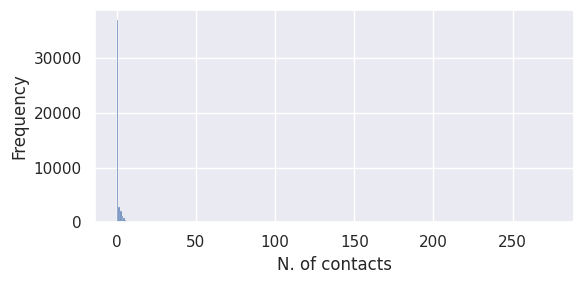

In [44]:
fig, ax = plt.subplots(figsize=(6, 3))

sns.histplot(data=X, x='previous', binwidth=1, ax=ax)
ax.set_xlabel('N. of contacts')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [45]:
df['poutcome_success'] = df['poutcome'] == 'success'
df['previous_trimmed'] = np.where(df['previous'] < 15, df['previous'], '15 or more')

NameError: ignored

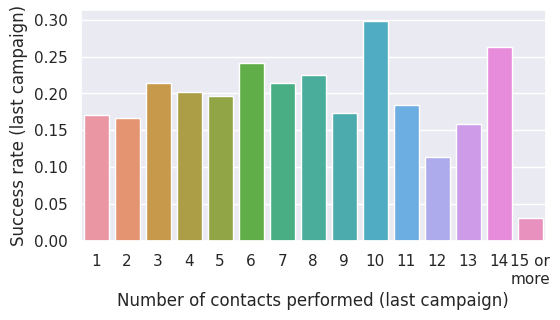

In [46]:
fig, ax = plt.subplots(figsize=(6, 3))

n_contacts_categories = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15 or more']

success_by_n_contacts = df.groupby('previous_trimmed')['poutcome_success'].mean().to_frame().reset_index()
success_by_n_contacts['previous_trimmed'] = pd.Categorical(success_by_n_contacts['previous_trimmed'],
                                                           ordered=True, categories=n_contacts_categories)

success_by_n_contacts['previous_trimmed'] = success_by_n_contacts['previous_trimmed'].replace({'15 or more': '15 or\nmore'})

sns.barplot(data=success_by_n_contacts, x='previous_trimmed', y='poutcome_success', ax=ax)

ax.set_xlabel('Number of contacts performed (last campaign)')
ax.set_ylabel('Success rate (last campaign)')

ax.yaxis.set_major_formatter(PercentFormatter(1))

plt.tight_layout()
plt.show()

In [47]:
df['outcome_success'] = df['y'] == 'yes'
df['campaign_trimmed'] = np.where(df['campaign'] < 15, df['campaign'], '15 or more')

In [48]:
df['campaign_trimmed'].value_counts()

1             17544
2             12505
3              5521
4              3522
5              1764
6              1291
7               735
15 or more      614
8               540
9               327
10              266
11              201
12              155
13              133
14               93
Name: campaign_trimmed, dtype: int64

NameError: ignored

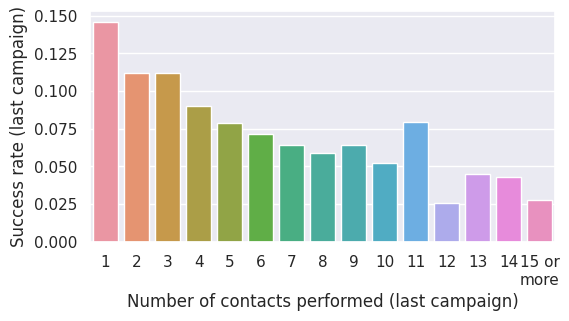

In [50]:
fig, ax = plt.subplots(figsize=(6, 3))

n_contacts_categories = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15 or more']

success_by_n_contacts = df.groupby('campaign_trimmed')['outcome_success'].mean().to_frame().reset_index()
success_by_n_contacts['campaign_trimmed'] = pd.Categorical(success_by_n_contacts['campaign_trimmed'],
                                                           ordered=True, categories=n_contacts_categories)

success_by_n_contacts['campaign_trimmed'] = success_by_n_contacts['campaign_trimmed'].replace({'15 or more': '15 or\nmore'})

sns.barplot(data=success_by_n_contacts, x='campaign_trimmed', y='outcome_success', ax=ax)

ax.set_xlabel('Number of contacts performed (last campaign)')
ax.set_ylabel('Success rate (last campaign)')

ax.yaxis.set_major_formatter(PercentFormatter(1))

plt.tight_layout()
plt.show()

In [51]:
df['campaign_trimmed'].value_counts()

1             17544
2             12505
3              5521
4              3522
5              1764
6              1291
7               735
15 or more      614
8               540
9               327
10              266
11              201
12              155
13              133
14               93
Name: campaign_trimmed, dtype: int64

3. Based on the adherence results of this campaign, what is the average and maximum number of calls that you recommend to optimize adherence?

4. Is the result of the previous campaign relevant to the current campaign?

In [ ]:
df[['poutcome', 'y']].value_counts().sort_index()

In [ ]:
df['y_yes'] = df['y'] == 'yes'

In [ ]:
df.loc[df['y_yes'], 'poutcome'].value_counts() / df[df['y_yes']].poutcome.value_counts().sum()

In [ ]:
df.groupby('poutcome')['y_yes'].mean()

5. What is the determining factor for the bank to require credit insurance?

In [ ]:
df.columns

In [ ]:
df['default'].value_counts()

In [ ]:
df['default_num'] = 1 * (df['default'] == 'yes')

In [ ]:
log_reg = smf.logit(formula='default_num ~ age + job + marital + balance + housing + loan + contact', data=df).fit()
print(log_reg.summary())

6. What are the prominent characteristics of a customer who has a housing loan?

In [ ]:
df.groupby('age')['housing'].mean().plot(kind='bar', figsize=(14, 4))

In [ ]:
df['age_gr_or_eq_35'] = df['age'] >= 35

In [ ]:
np.sum(df['balance'] == 0)

In [ ]:
np.sum(df['balance'] != 0)

In [ ]:
df['balance_round_1k'] = np.round(df['balance'] / 1000) * 1000
df.groupby('balance_round_1k')['housing'].mean().plot(kind='bar', figsize=(14, 4))

In [ ]:
df['balance_lr_0'] = df['balance'] < 0

In [ ]:
df['housing_num'] = 1 * df['housing']

log_reg = smf.logit(formula='housing_num ~ age*age_gr_or_eq_35 + job + marital + balance*balance_lr_0 + contact', data=df).fit()
print(log_reg.summary())

Some characteristics that are generally linked to having a housing loan are:
- blue-collar professionals, followed by workers in the service field;
- divorced people (the reference group for the `marital` feature);
- people aged around 35;
- people whose contact was made via cell phone (the reference group for the `contact` feature);
- people whose average yearly balance is negative